<a href="https://colab.research.google.com/github/pankajmahtolia/Machine-Learning/blob/Regression/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset= pd.read_csv('Position_Salaries.csv')
X= dataset.iloc[:, 1:-1].values
y= dataset.iloc[:, -1].values
print(X)
print('\n')
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
  700000  900000 1100000 1360000 1600000 2000000 2300000 2400000 2900000
 3100000 3800000]


In [ ]:
y= y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [ 700000]
 [ 900000]
 [1100000]
 [1360000]
 [1600000]
 [2000000]
 [2300000]
 [2400000]
 [2900000]
 [3100000]
 [3800000]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(y_train)
print('\n')
print(X_test)
print(y_test)

[[11]
 [18]
 [ 7]
 [14]
 [ 5]
 [ 3]
 [ 6]
 [15]
 [10]
 [ 8]
 [17]
 [12]
 [ 4]
 [ 1]
 [16]
 [13]]
[[ 900000]
 [2900000]
 [ 200000]
 [1600000]
 [ 110000]
 [  60000]
 [ 150000]
 [2000000]
 [ 700000]
 [ 300000]
 [2400000]
 [1100000]
 [  80000]
 [  45000]
 [2300000]
 [1360000]]


[[19]
 [ 2]
 [20]
 [ 9]]
[[3100000]
 [  50000]
 [3800000]
 [ 500000]]


**Feature Scalling**

In [ ]:
#Feature scalling is done because to compansate the difference in the data values...
#While in LR, MLR, PLR coefficients where there to compansate the difference...
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_y= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

y_train= sc_y.fit_transform(y_train)
y_test= sc_y.transform(y_test)


In [ ]:
print(X_train)
print(y_train)
print('\n')
print(X_test)
print(y_test)

[[ 0.19425717]
 [ 1.55405738]
 [-0.58277152]
 [ 0.77702869]
 [-0.97128586]
 [-1.35980021]
 [-0.77702869]
 [ 0.97128586]
 [ 0.        ]
 [-0.38851434]
 [ 1.35980021]
 [ 0.38851434]
 [-1.16554303]
 [-1.74831455]
 [ 1.16554303]
 [ 0.58277152]]
[[-0.11998785]
 [ 2.0072205 ]
 [-0.86451077]
 [ 0.62453508]
 [-0.96023514]
 [-1.01341535]
 [-0.91769098]
 [ 1.04997674]
 [-0.33270868]
 [-0.75815035]
 [ 1.47541841]
 [ 0.09273299]
 [-0.99214327]
 [-1.02936941]
 [ 1.369058  ]
 [ 0.36927007]]


[[ 1.74831455]
 [-1.55405738]
 [ 1.94257172]
 [-0.19425717]]
[[ 2.21994133]
 [-1.02405139]
 [ 2.96446426]
 [-0.54542951]]


**Training The Model**

In [ ]:
from sklearn.svm import SVR
regressor= SVR(kernel= 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Predicting Result for Test set**

In [ ]:
print(sc_X.inverse_transform(X_test))
print('   ')
print(sc_y.inverse_transform(y_test))
print('\n')
print('Predicted result for X_test is ')
print(sc_y.inverse_transform(regressor.predict(X_test)))

[[19.]
 [ 2.]
 [20.]
 [ 9.]]
   
[[3100000.]
 [  50000.]
 [3800000.]
 [ 500000.]]


Predicted result for X_test is 
[2300255.90843702   97315.01984716 2135842.43801512  517081.07960362]


In [ ]:
#Self choosen value
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[10]]))))

[676958.65182973]


**Visulizing the model**

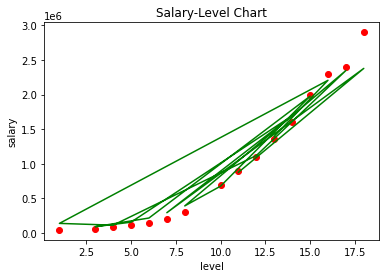

In [ ]:
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color='red')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(regressor.predict(X_train)), color='green')
plt.title('Salary-Level Chart')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()

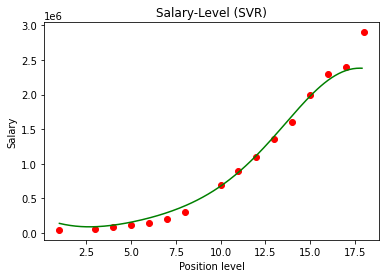

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X_train)), max(sc_X.inverse_transform(X_train)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'green')
plt.title('Salary-Level (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Visulizing Test Set result in Graph**

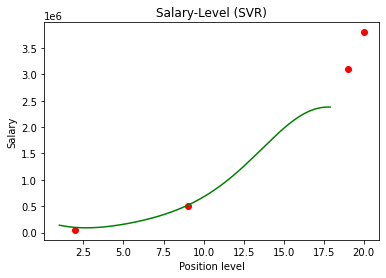

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X_train)), max(sc_X.inverse_transform(X_train)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'green')
plt.title('Salary-Level (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()